In [13]:
#Importing neccessary datasets
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Data Wrangling
filepath = 'C:/Users/ACER/OneDrive/Documents/Datasets/Heart Disease/heart.csv'
data = pd.read_csv(filepath)
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
#Prepare data for modeling
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print('X values\n' + str(X))
print('\ntarget values\n' + str(y))

X values
[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]

target values
[0 0 0 ... 0 1 0]


In [16]:
#Splitting data set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 1)

#Standardizing the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
#Using Logistic Regression for classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred)) # Display accuracy report

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       109
           1       0.75      0.90      0.82        96

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [18]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
accuracy_score(y_test, y_pred)

[[80 29]
 [10 86]]


0.8097560975609757

Feature : 0, Score: -0.09912
Feature : 1, Score: -0.79835
Feature : 2, Score: 0.85631
Feature : 3, Score: -0.25880
Feature : 4, Score: -0.24248
Feature : 5, Score: -0.01872
Feature : 6, Score: 0.28598
Feature : 7, Score: 0.56371
Feature : 8, Score: -0.50295
Feature : 9, Score: -0.64920
Feature : 10, Score: 0.25960
Feature : 11, Score: -0.68523
Feature : 12, Score: -0.50522


<AxesSubplot:>

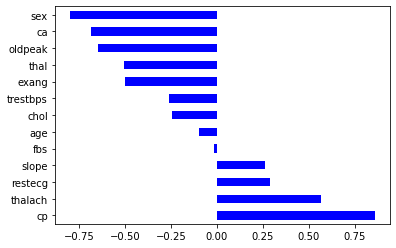

In [19]:
#Checking feature importance
imp = model.coef_[0]

for i,v in  enumerate(imp):
    print('Feature : %0d, Score: %.5f' % (i, v))
    
idx = data.columns[:-1]
imp = pd.Series(model.coef_[0], index = idx)
imp.nlargest(13).plot(kind='barh', colormap='winter')

In [20]:
#Prediction test
out = model.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]]))
print(out)
if out == 1:
    print("Heart disease prone")
else:
    print("Heart disease free")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[1]
Heart disease prone
[[0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1

In [21]:
#Deploy Model
import pickle as pkl
# save the model to disk
filename = 'heart_disease.pkl'
pkl.dump(sc, open(filename, 'wb'))

In [22]:
#A lot of credit goes to Jarar Zaidi on towardsdatascience.com
#link https://towardsdatascience.com/project-predicting-heart-disease-with-classification-machine-learning-algorithms-fd69e6fdc9d6